In [1]:
import os
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
sys.path.append("../../src/.")
import plotting_functions as pf

In [3]:
DIR = "../../data/"
SUBWAYUS = "Subway USA/subway_usa_"

In [4]:
train_df = pd.read_csv(DIR + SUBWAYUS + "processed_train.csv", index_col="store")
test_df = pd.read_csv(DIR + SUBWAYUS + "processed_test.csv", index_col="store")

In [5]:
result_df = pd.DataFrame([], index=train_df.index)

## PCA

### Test for Mininum Components to Capture 90% Variance

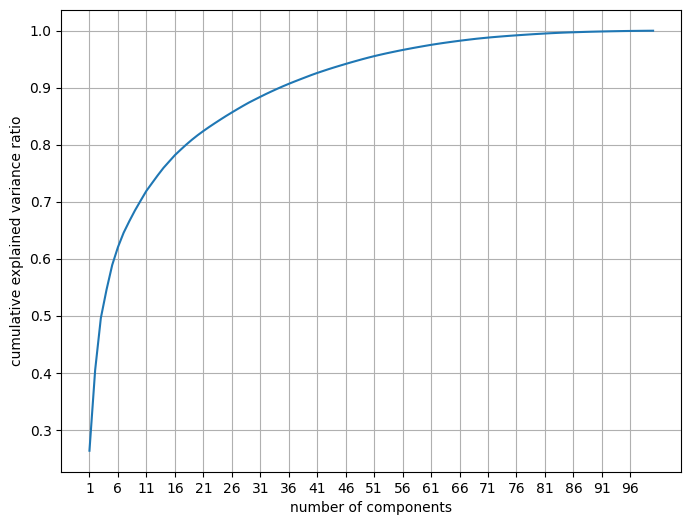

35

In [7]:
pf.pca_plot(train_df)

### PCA model (90% Variance) - Layer 1

In [8]:
pca_1 = PCA(n_components=35, whiten=True, random_state=42)
pca_1.fit(train_df)

PCA(n_components=35, random_state=42, whiten=True)

#### Filter and Count Important Features (of heavy weights)

Filter the values in the PCA component matrix, and count the occurrence of the features in the filtered matrix.

In [9]:
W = abs(pca_1.components_)
features = train_df.columns
long_results = []
for i in range(W.shape[0]):
    array = W[i]
    heavy_idx = np.where(array > 0.2)
    long_results += list(features[heavy_idx])

In [10]:
count = pd.Series(long_results).value_counts()
pca_features = count.index.tolist()
len(count)

66

In [11]:
weighted_W = pca_1.explained_variance_ratio_ * W.T
pca_feature_weight = pd.Series(np.sum(weighted_W, axis=1), index=train_df.columns.tolist())
pca_feature_weight = pca_feature_weight.filter(items=pca_features, axis=0)
pca_feature_weight.sort_values(ascending=False, inplace=True)
pca_feature_weight

market_size                   0.151985
store_density                 0.076925
emp_p_ta                      0.068560
centerxy_gla_effective_5mi    0.068337
genx_p_ta                     0.067440
                                ...   
occ_bc_p_ta                   0.051100
hhinc30lt_p_ta                0.050295
popgr10cn_ta                  0.049126
wealth_hhavg_ta               0.047430
other_p_ta                    0.039875
Length: 66, dtype: float64

In [12]:
important_features = pca_feature_weight[:60].index.tolist()

In [13]:
reduced_train = train_df[pca_features]
reduced_test = test_df[pca_features]
reduced_train

,market_size,popgr10cn_ta,other_p_ta,nces_public_schools_nearest_dist,osm_highway_exits_count_1mi,gq_other_p_ta,occ_unclassified_p_ta,com0811_p_ta,inrix_total_ta,occ_bc_p_ta,...,popgrfy_ta,hhgrfypy_ta,pop5y_cagr_ta,popgrpy_ta,emp_p_ta,age85pl_p_ta,dmm_count_1mi,dmm_gla_1mi,wealth_hhavg_ta,dtpop_unemployed_p_ta
store,,,,,,,,,,,,,,,,,,,,,
6150300,2.0,-0.248036,-0.352255,-0.719608,-0.034179,2.510505,-0.408704,3.304383,-0.587414,-0.418402,...,0.002419,-0.012383,-0.629070,-0.622184,-1.404416,-0.226018,-0.462636,-0.408427,-1.073302,1.294902
3784100,2.0,0.285237,0.213035,0.703190,-0.294265,1.338613,-0.319611,-1.035261,1.135356,0.375126,...,0.779724,0.805274,0.997839,0.968952,-1.655621,0.803634,0.637963,1.359225,0.284724,0.353116
1192500,2.0,-0.241841,0.068600,-0.398347,-0.554352,-0.744864,0.045673,-0.493172,-0.593298,0.540203,...,-0.512590,-0.518590,-0.343151,-0.349460,0.149498,0.021494,0.637963,1.139668,0.174865,0.612588
449400,4.0,-0.117522,-0.399570,-0.533603,-0.554352,-0.151132,-0.141424,-0.425777,-0.999861,-0.273598,...,-0.291623,-0.290843,-0.187525,-0.199782,-0.014267,0.665027,0.637963,0.463615,-0.659364,0.429997
2292700,0.0,-0.187331,-0.250154,-0.303830,-0.554352,-0.471355,-0.399795,1.090608,2.300364,0.307068,...,-0.386272,-0.378994,-0.344219,-0.350559,-0.575217,-0.216118,-0.462636,-0.408427,0.042790,0.775959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440100,4.0,-0.299179,-0.334823,-0.805969,-0.034179,-0.682918,-0.435432,-0.920983,-0.134447,-0.151962,...,-1.706438,-1.711277,-1.212880,-1.169971,-0.121715,0.635326,-0.462636,-0.408427,-0.227713,0.180135
6487000,4.0,0.038132,-0.299959,0.241304,0.225908,-0.743172,-0.257245,-0.836007,0.289174,0.159367,...,-0.193105,-0.184894,0.055106,0.035201,0.761578,-0.374526,-0.462636,-0.408427,-0.127952,-0.905801
2493300,1.0,-0.235070,-0.302450,0.398550,-0.554352,-0.614203,-0.301792,1.317699,-0.142035,-0.548726,...,-0.598604,-0.604163,-0.333958,-0.340691,0.282140,0.298708,-0.462636,-0.408427,0.130770,0.324286


In [14]:
def corr_pair(target_corr, corr_threshold=0.6):
    np.fill_diagonal(target_corr.values, 0)
    sorted_pair = target_corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
    return sorted_pair[sorted_pair > corr_threshold]



In [16]:
def corr_pair_drop(feature_pairs, corr_with_target):
    selected, discarded = [], []
    for f1, f2 in feature_pairs:
        if abs(corr_with_target[f1]) < abs(corr_with_target[f2]):
            selected.append(f2)
            discarded.append(f1)
        else:
            selected.append(f1)
            discarded.append(f2)
    final_discarded = set(discarded) - set(selected) 
    return list(final_discarded)

In [15]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:40:2]

pop5y_cagr_ta                 popgrpy_ta                            0.999096
hhgrfypy_ta                   popgrfy_ta                            0.998156
hh_inc_lt_75k_p_ta            hh_inc_gt_75k_p_ta                    0.998023
popgrpy_ta                    hhgrpycy_ta                           0.997022
dtpop_students_p_ta           dtpop_students_post_secondary_p_ta    0.996903
hhgrpycy_ta                   pop5y_cagr_ta                         0.996545
dtpop_students_prek_8th_p_ta  dtpop_children_at_home_p_ta           0.991309
hhinc100pl_p_ta               disposable_inc_avg_ta                 0.989117
disposable_inc_avg_ta         medhhinc_ta                           0.984030
medhhinc_ta                   hhinc100pl_p_ta                       0.978550
hh_inc_gt_75k_p_ta            hhinc100pl_p_ta                       0.975142
hh_inc_lt_75k_p_ta            hhinc100pl_p_ta                       0.973996
disposable_inc_avg_ta         hh_inc_gt_75k_p_ta                    0.965990

In [17]:
corr_drop_list = corr_pair_drop(correlated_pairs.index, pca_feature_weight)
print(corr_drop_list)

In [20]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.drop(columns=corr_drop_list, inplace=True)
/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test.drop(columns=corr_drop_list, inplace=True)


In [19]:
important_features = list(set(important_features) - set(corr_drop_list))

In [22]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:20:2]

pop5y_cagr_ta          popgrpy_ta            0.999096
hh_inc_lt_75k_p_ta     hh_inc_gt_75k_p_ta    0.998023
hhgrpycy_ta            popgrpy_ta            0.997022
                       pop5y_cagr_ta         0.996545
disposable_inc_avg_ta  hhinc100pl_p_ta       0.989117
                       medhhinc_ta           0.984030
hhinc100pl_p_ta        medhhinc_ta           0.978550
                       hh_inc_gt_75k_p_ta    0.975142
                       hh_inc_lt_75k_p_ta    0.973996
disposable_inc_avg_ta  hh_inc_gt_75k_p_ta    0.965990
dtype: float64

In [23]:
corr_drop_list = corr_pair_drop(correlated_pairs.index, pca_feature_weight)
print(corr_drop_list)

['hh_type_male_p_ta', 'hhinc30lt_p_ta', 'com12pl_p_ta', 'popgrpy_ta', 'dmm_gla_1mi', 'centerxy_gla_effective_5mi', 'dtpop_children_at_home_p_ta']


In [24]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.drop(columns=corr_drop_list, inplace=True)
/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test.drop(columns=corr_drop_list, inplace=True)


In [25]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:20:2]

hh_inc_lt_75k_p_ta     hh_inc_gt_75k_p_ta       0.998023
hhgrpycy_ta            pop5y_cagr_ta            0.996545
disposable_inc_avg_ta  hhinc100pl_p_ta          0.989117
medhhinc_ta            disposable_inc_avg_ta    0.984030
                       hhinc100pl_p_ta          0.978550
hh_inc_gt_75k_p_ta     hhinc100pl_p_ta          0.975142
hh_inc_lt_75k_p_ta     hhinc100pl_p_ta          0.973996
disposable_inc_avg_ta  hh_inc_gt_75k_p_ta       0.965990
                       hh_inc_lt_75k_p_ta       0.964070
hh_inc_gt_75k_p_ta     medhhinc_ta              0.960077
dtype: float64

In [26]:
corr_drop_list = corr_pair_drop(correlated_pairs.index, pca_feature_weight)
print(corr_drop_list)

['hh_inc_lt_75k_p_ta', 'hhgrfypy_ta']


In [27]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.drop(columns=corr_drop_list, inplace=True)
/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test.drop(columns=corr_drop_list, inplace=True)


In [28]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:20:2]

pop5y_cagr_ta          hhgrpycy_ta              0.996545
disposable_inc_avg_ta  hhinc100pl_p_ta          0.989117
medhhinc_ta            disposable_inc_avg_ta    0.984030
hhinc100pl_p_ta        medhhinc_ta              0.978550
hh_inc_gt_75k_p_ta     hhinc100pl_p_ta          0.975142
                       disposable_inc_avg_ta    0.965990
                       medhhinc_ta              0.960077
dtype: float64

In [29]:
corr_drop_list = corr_pair_drop(correlated_pairs.index, pca_feature_weight)
print(corr_drop_list)

['pop5y_cagr_ta', 'hh_inc_gt_75k_p_ta']


In [30]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_train.drop(columns=corr_drop_list, inplace=True)
/var/folders/t1/c4fmzstn5v92jwsl8z5vhpp40000gn/T/ipykernel_90595/1625573170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_test.drop(columns=corr_drop_list, inplace=True)


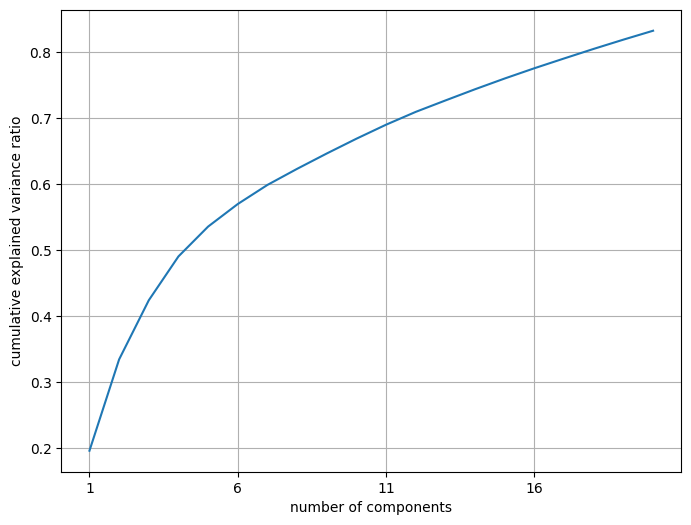

UnboundLocalError: local variable 'num_comp' referenced before assignment

In [23]:
pf.pca_plot(reduced_train, n_components=20)

In [47]:
pca_2 = PCA(n_components=11, whiten=True, random_state=42)
pca_2.fit(reduced_train)

PCA(n_components=11, random_state=42, whiten=True)

#### Filter and Count Important Features (of heavy weights)

Filter the values in the PCA component matrix, and count the occurrence of the features in the filtered matrix.

In [49]:
W = abs(pca_2.components_)
features = reduced_train.columns
long_results = []
for i in range(W.shape[0]):
    array = W[i]
    heavy_idx = np.where(array > 0.15)
    long_results += list(features[heavy_idx])

In [51]:
count = pd.Series(long_results).value_counts()
count

market_size                                         7
hh_type_nonfam_p_ta                                 6
occ_military_p_ta                                   5
genz_p_ta                                           5
dmm_count_1mi                                       4
age85pl_p_ta                                        4
centerxy_gla_effective_2mi                          4
com12pl_p_ta                                        4
dmm_gla_2mi                                         4
ipeds_postsecondary_schools_total_enrollment_2mi    4
dtpop_students_post_secondary_p_ta                  4
occ_bc_p_ta                                         4
white_p_ta                                          3
dmm_gla_1mi                                         3
military_installations_3mi                          3
military_installations_1mi                          3
com0811_p_ta                                        3
dtpop_children_at_home_p_ta                         3
military_installations_5mi  

In [52]:
pca_2_features = count.index.tolist()

In [53]:
weighted_W = pca_2.explained_variance_ratio_ * W.T
pca_2_feature_weight = pd.Series(np.sum(weighted_W, axis=1), index=reduced_train.columns.tolist())
pca_2_feature_weight = pca_2_feature_weight.filter(items=pca_2_features, axis=0)
pca_2_feature_weight.sort_values(ascending=False, inplace=True)
pca_2_feature_weight

inrix_total_ta                                      0.698371
market_size                                         0.109998
dmm_gla_2mi                                         0.045684
centerxy_gla_effective_2mi                          0.044329
white_p_ta                                          0.042552
dmm_count_1mi                                       0.041124
dmm_gla_1mi                                         0.040779
dmm_nearest_dist                                    0.040001
disposable_inc_avg_ta                               0.039145
genx_p_ta                                           0.038663
hhinc100pl_p_ta                                     0.038130
hh_inc_gt_75k_p_ta                                  0.037762
hh_inc_lt_75k_p_ta                                  0.037706
popgrfy_ta                                          0.037641
hh_type_female_nochild_p_ta                         0.037574
hhgrfypy_ta                                         0.037565
medhhinc_ta             

In [54]:
pca_2_feature_weight = pca_2_feature_weight.sort_values(ascending=False)
important_features_2 = pca_2_feature_weight[:40].index.tolist()

In [55]:
important_features = list(set(important_features + important_features_2))

In [56]:
reduced_train = reduced_train[important_features]
reduced_test = reduced_test[important_features]
reduced_train

,dtpop_students_post_secondary_p_ta,pop5y_cagr_ta,hh_type_male_p_ta,occ_unclassified_p_ta,occ_bc_p_ta,nces_public_schools_nearest_dist,hh_type_nonfam_p_ta,com12pl_p_ta,popgrpy_ta,dmm_count_1mi,...,genz_p_ta,occ_military_p_ta,dmm_gla_1mi,white_p_ta,hh_inc_lt_75k_p_ta,black_p_ta,hhgrfypy_ta,gq_other_p_ta,dmm_gla_2mi,hh_type_female_nochild_p_ta
store,,,,,,,,,,,,,,,,,,,,,
6150300,-0.247143,-0.629070,1.041346,-0.408704,-0.418402,-0.719608,-1.109287,0.148031,-0.622184,-0.462636,...,0.185124,-0.12575,-0.408427,-1.749451,1.280023,-0.325387,-0.012383,2.510505,-0.434744,1.888641
3784100,-0.163931,0.997839,-0.046505,-0.319611,0.375126,0.703190,-0.371554,0.258930,0.968952,0.637963,...,-0.207241,-0.12575,1.359225,0.029789,0.090226,0.081633,0.805274,1.338613,0.371039,0.268583
1192500,-0.514482,-0.343151,-0.167916,0.045673,0.540203,-0.398347,0.366179,0.312257,-0.349460,0.637963,...,-0.469702,-0.12575,1.139668,0.457056,-0.255337,-0.472435,-0.518590,-0.744864,0.639123,-0.354001
449400,-0.287863,-0.187525,0.477995,-0.141424,-0.273598,-0.533603,0.143518,0.076772,-0.199782,0.637963,...,-0.183381,-0.12575,0.463615,0.363884,0.574587,-0.546890,-0.290843,-0.151132,0.745324,0.007500
2292700,0.301700,-0.344219,0.783953,-0.399795,0.307068,-0.303830,-0.645186,0.931878,-0.350559,-0.462636,...,0.177171,-0.12575,-0.408427,-1.577531,-0.731828,-0.654849,-0.378994,-0.471355,-0.049046,1.256015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440100,-0.542810,-1.212880,-0.527296,-0.435432,-0.151962,-0.805969,-0.103288,-0.524916,-1.169971,-0.462636,...,-0.649978,-0.12575,-0.408427,1.167739,0.697645,-0.551233,-1.711277,-0.682918,-0.611623,0.318792
6487000,0.558417,0.055106,0.249740,-0.257245,0.159367,0.241304,-0.578119,-0.904806,0.035201,-0.462636,...,0.357447,-0.12575,-0.408427,-0.164352,0.481579,1.251193,-0.184894,-0.743172,1.362032,-0.056098
2493300,-0.544580,-0.333958,-0.221338,-0.301792,-0.548726,0.398550,1.028797,-0.889705,-0.340691,-0.462636,...,-0.649978,-0.12575,-0.408427,1.018819,-0.265354,-0.649885,-0.604163,-0.614203,0.005481,-0.745626


In [57]:
def corr_pair(target_corr, corr_threshold=0.6):
    np.fill_diagonal(target_corr.values, 0)
    sorted_pair = target_corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
    return sorted_pair[sorted_pair > corr_threshold]

correlated_pairs = corr_pair(reduced_train.corr())

In [58]:
correlated_pairs[:40:2]

popgrpy_ta             pop5y_cagr_ta         0.999096
hhgrfypy_ta            popgrfy_ta            0.998156
hh_inc_lt_75k_p_ta     hh_inc_gt_75k_p_ta    0.998023
disposable_inc_avg_ta  hhinc100pl_p_ta       0.989117
                       medhhinc_ta           0.984030
medhhinc_ta            hhinc100pl_p_ta       0.978550
hhinc100pl_p_ta        hh_inc_gt_75k_p_ta    0.975142
disposable_inc_avg_ta  avg_faminc_ta         0.974317
hhinc100pl_p_ta        hh_inc_lt_75k_p_ta    0.973996
avg_faminc_ta          hhinc100pl_p_ta       0.966812
disposable_inc_avg_ta  hh_inc_gt_75k_p_ta    0.965990
                       hh_inc_lt_75k_p_ta    0.964070
hh_inc_gt_75k_p_ta     medhhinc_ta           0.960077
medhhinc_ta            hh_inc_lt_75k_p_ta    0.958584
avg_faminc_ta          medhhinc_ta           0.952972
hhinc30lt_p_ta         hh_inc_lt_75k_p_ta    0.941599
hh_inc_gt_75k_p_ta     hhinc30lt_p_ta        0.940278
                       avg_faminc_ta         0.935531
hh_inc_lt_75k_p_ta     avg_f

In [33]:
print(pca_feature_weight['military_installations_5mi'], pca_feature_weight['military_installations_3mi'])
print(pca_feature_weight['centerxy_gla_effective_1mi'], pca_feature_weight['dmm_gla_1mi'])
print(pca_feature_weight['osm_highway_exits_count_2mi'], pca_feature_weight['osm_highway_exits_count_1mi'])

0.03782548252596881 0.041533142106797136
0.036444494335065775 0.03868716193509502
0.04243214809911437 0.03517307532439087


In [34]:
corr_drop_list = ['dmm_count_1mi', 'military_installations_5mi', 'dmm_gla_1mi', 'osm_highway_exits_count_1mi', 'hrsa_hospitals_1mi']

In [35]:
reduced_train.drop(columns=corr_drop_list, inplace=True)
reduced_test.drop(columns=corr_drop_list, inplace=True)

KeyError: "['military_installations_5mi', 'osm_highway_exits_count_1mi', 'hrsa_hospitals_1mi'] not found in axis"

In [ ]:
correlated_pairs = corr_pair(reduced_train.corr())
correlated_pairs[:100:2]